In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [182]:
# !pip install xlrd

In [183]:
df = pd.read_excel("Sample_Superstore.xls", header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [185]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [186]:
furniture = df[df['Category']=='Furniture']
furniture.shape

(2121, 21)

In [187]:
furniture['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [188]:
furniture['Order Date'] = furniture['Order Date'].astype(str)
furniture.dtypes

C:\Users\amalp\AppData\Local\Temp\ipykernel_19640\3256498473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture['Order Date'] = furniture['Order Date'].astype(str)


Row ID                    int64
Order ID                 object
Order Date               object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [189]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.dtypes

C:\Users\amalp\AppData\Local\Temp\ipykernel_19640\1412824281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [190]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [191]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [192]:
furniture = furniture[['Order Date','Sales']]
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [193]:
furniture.sort_values('Order Date', ascending=True, inplace=True)
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [194]:
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [195]:
#shows number of records in df for each dates
furniture['Order Date'].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

In [196]:
#sum sales of similar dates
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [197]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [198]:
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [199]:
#M - month
#Y - year
#D- Day
#W - week
y = furniture['Sales'].resample('M').mean()
print(y.shape)

(48,)


In [200]:
y

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

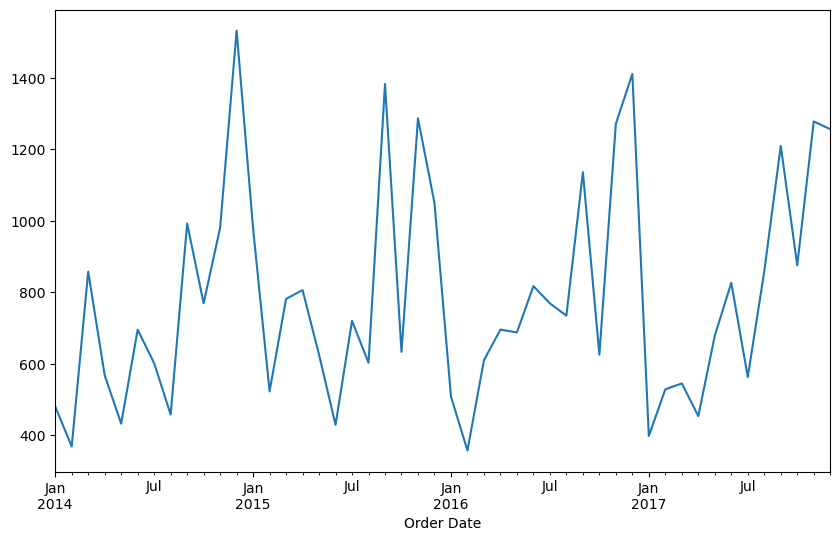

In [201]:
y.plot(figsize=(10,6))
plt.show()

In [202]:
# to create train data from first till a date
train = y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [203]:
test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

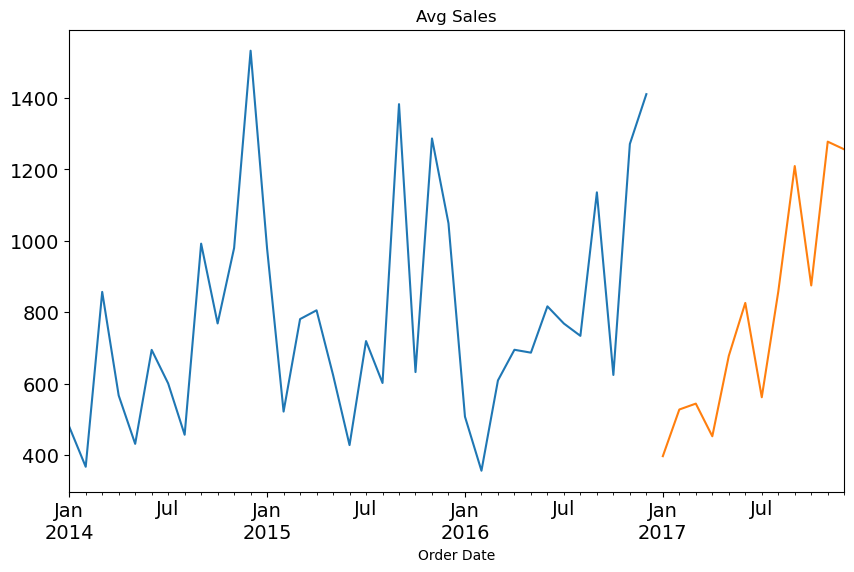

In [204]:
train.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
test.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
plt.show()

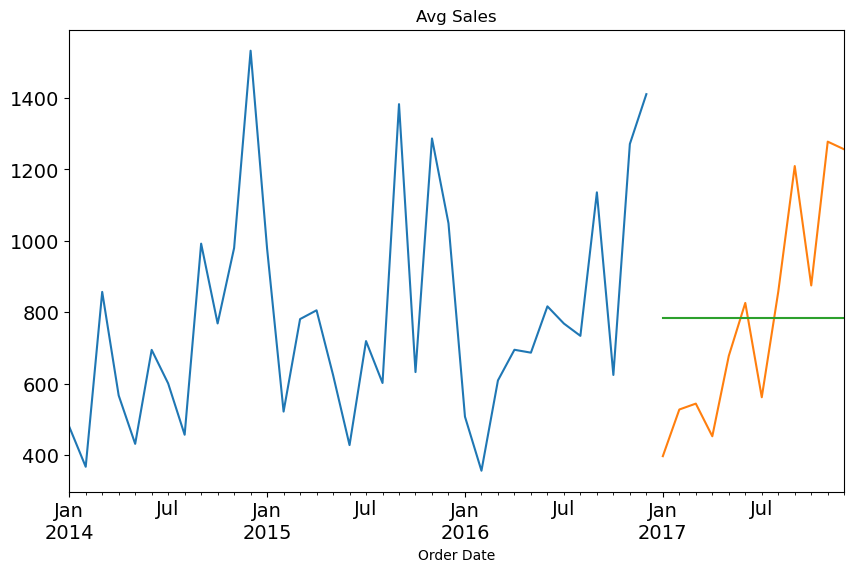

In [205]:
#EXPONENTIAL SMOOTHING
#Simple model/first exponential

Exp_Smooth =  test.copy()
#smoothing value = alpha
#value b/w 0-1
#value close to one means older value equally imp, value close to 0 means older value not so imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
test.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title='Avg Sales', fontsize=14)
plt.show()


In [206]:
Exp_Smooth.SES

2017-01-31    784.196954
2017-02-28    784.196954
2017-03-31    784.196954
2017-04-30    784.196954
2017-05-31    784.196954
2017-06-30    784.196954
2017-07-31    784.196954
2017-08-31    784.196954
2017-09-30    784.196954
2017-10-31    784.196954
2017-11-30    784.196954
2017-12-31    784.196954
Freq: M, dtype: float64

In [207]:
fit1.aic

415.87664216026513

In [208]:
rmse_simExp = np.sqrt(mean_squared_error(test, Exp_Smooth.SES))
print("rmse for simple exp : ", rmse_simExp)

rmse for simple exp :  303.4766834364632


C:\Users\amalp\AppData\Local\Temp\ipykernel_19640\698111213.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(train).fit(smoothing_level=0.01, smoothing_slope=0.25)


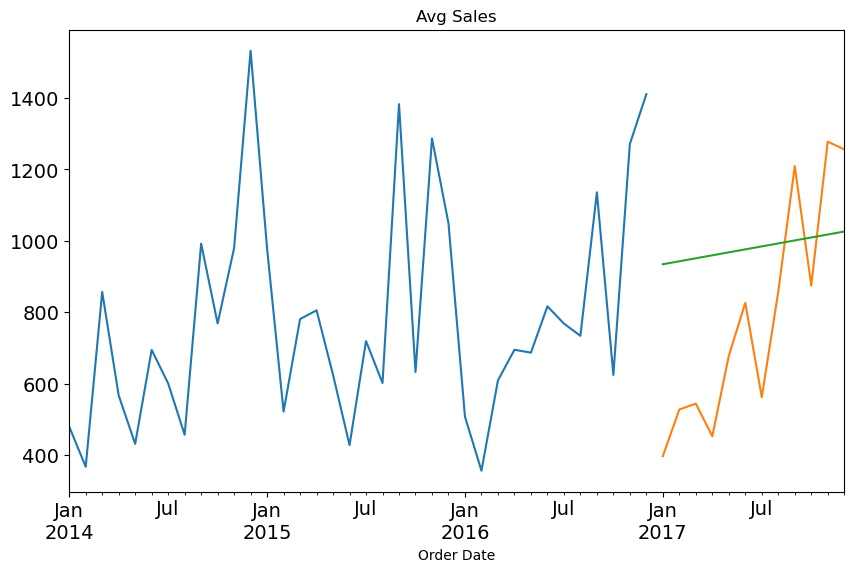

In [209]:
holt_df = test.copy()

fit2 = Holt(train).fit(smoothing_level=0.01, smoothing_slope=0.25)
holt_df['Holt_Linear'] = fit2.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
test.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
holt_df['Holt_Linear'].plot(figsize=(10,6), title='Avg Sales', fontsize=14)
plt.show()

In [210]:
holt_df.Holt_Linear

2017-01-31     934.738302
2017-02-28     943.061403
2017-03-31     951.384504
2017-04-30     959.707605
2017-05-31     968.030706
2017-06-30     976.353807
2017-07-31     984.676908
2017-08-31     993.000009
2017-09-30    1001.323109
2017-10-31    1009.646210
2017-11-30    1017.969311
2017-12-31    1026.292412
Freq: M, dtype: float64

In [211]:
fit2.aic

416.9527957653322

In [212]:
rmse_holtLin = np.sqrt(mean_squared_error(test,holt_df.Holt_Linear))
print("rmse for Holt Linear : ",rmse_holtLin)

rmse for Holt Linear :  337.53825176297414


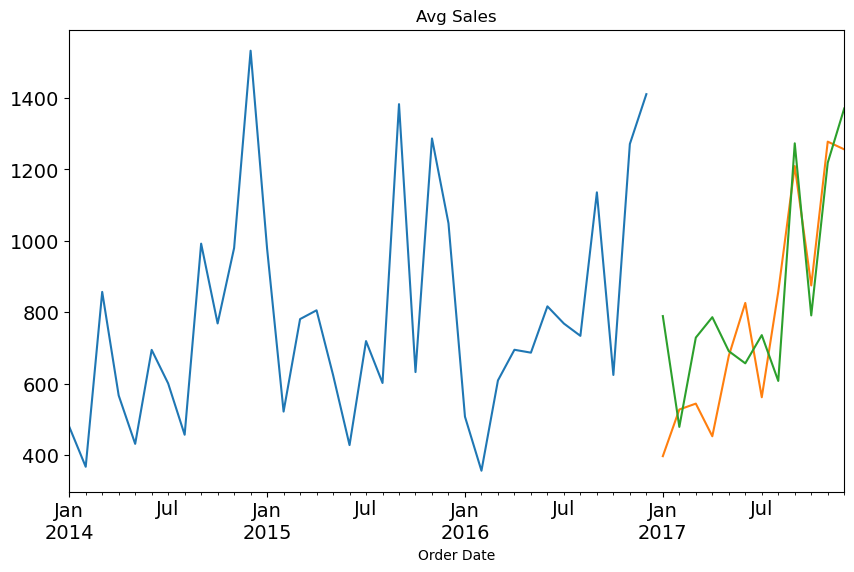

In [213]:
#holt winter / 3rd exp smoothing
holt_winter_df = test.copy()

fit3 = ExponentialSmoothing(train, seasonal_periods=12,
                          trend='add', seasonal='add').fit()
holt_winter_df['holt_winter'] = fit3.forecast(steps = len(test))

train.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
test.plot(figsize=(10,6), title='Avg Sales', fontsize=14)
holt_winter_df['holt_winter'].plot(figsize=(10,6), title='Avg Sales', fontsize=14)
plt.show()

In [214]:
fit3.aic

392.39062467774284

In [215]:
rmse_holtWinter = np.sqrt(mean_squared_error(test,holt_winter_df.holt_winter))
print("Rmse of holtWinter : ", rmse_holtWinter)

Rmse of holtWinter :  193.7115288576619


In [216]:
#Arima model

In [217]:
!pip install pmdarima

In [218]:
import pmdarima as pm

In [229]:
model = pm.auto_arima(y, start_p=0, max_p=3, d=None, max_d=2, start_q=0, max_q=3,
                      start_P=0, max_P=3, max_D=2, start_Q=0, max_Q=3, 
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf', trace=True, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.03 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.11 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.11 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.30 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.53 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.24 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [230]:
model.aic()

489.4176261246758

In [233]:
model = SARIMAX(y, order=(3,2,0),seasonal_order=(1,0,0,12)).fit()

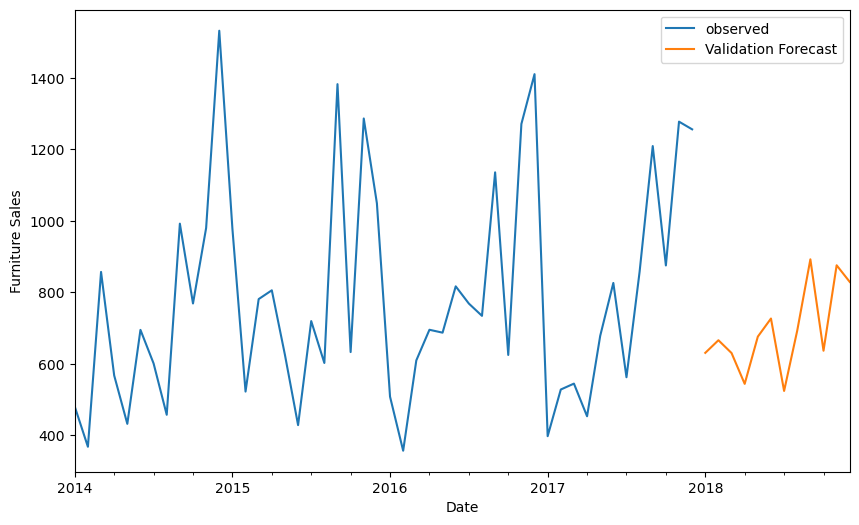

In [234]:
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [235]:
pred.predicted_mean

2018-01-31    630.752620
2018-02-28    666.072178
2018-03-31    630.228196
2018-04-30    543.980234
2018-05-31    676.181844
2018-06-30    726.842205
2018-07-31    524.111806
2018-08-31    693.083625
2018-09-30    892.478539
2018-10-31    636.730565
2018-11-30    875.852192
2018-12-31    829.198870
Freq: M, Name: predicted_mean, dtype: float64

In [236]:
y_pred = pred.predicted_mean
y_test = y['2017-01-31':]

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Rmse for SARIMA : ",rmse)

Rmse for SARIMA :  228.93280840183564


In [238]:
!pip install xlwt

  Using cached xlwt-1.3.0-py2.py3-none-any.whl (99 kB)


In [239]:
pred.predicted_mean.to_excel("TimeSeriesOutput.xls", index=True)

C:\Users\amalp\AppData\Local\Temp\ipykernel_19640\3914795081.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pred.predicted_mean.to_excel("TimeSeriesOutput.xls", index=True)
